In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
file_path = "68_nodes_node_wabash_river_74266700241_2023_03_01t00_00_00z_2025_03_11t19_44_21z.csv"
df = pd.read_csv(file_path)

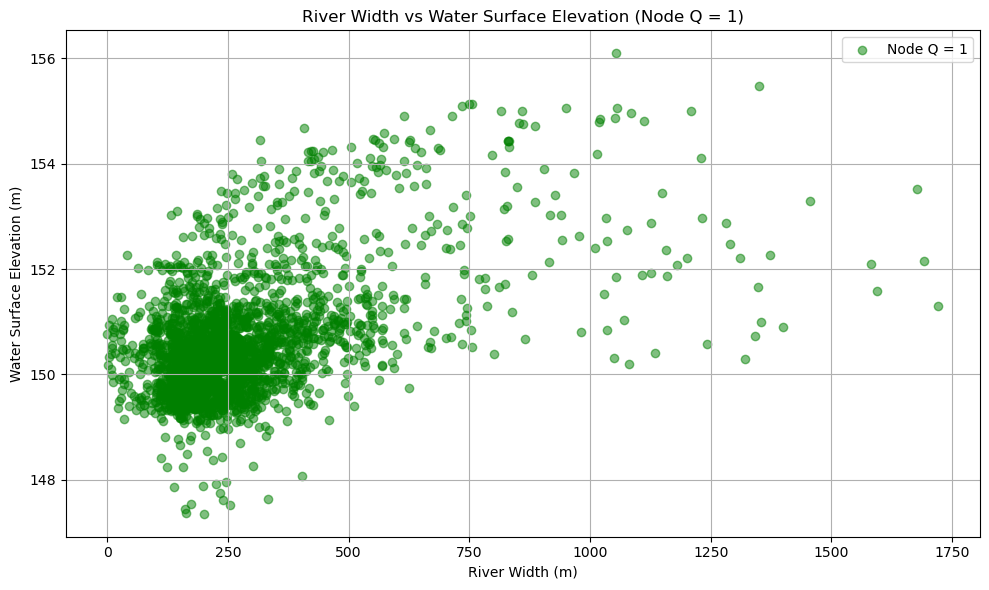

In [29]:
# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(node_q1_data['width'], node_q1_data['wse'], alpha=0.5, c='green', label='Node Q = 1')
plt.title('River Width vs Water Surface Elevation (Node Q = 1)')
plt.xlabel('River Width (m)')
plt.ylabel('Water Surface Elevation (m)')
plt.legend()
plt.grid()
plt.tight_layout()

# Save the figure
output_path = 'figures_env_inf/River Width vs Water Surface Elevation (Node Q = 1).png'
plt.savefig(output_path, dpi=300)  # Save with high resolution
plt.show()

In [8]:
df.head()


,wse,width,area_total,time_str,node_q,p_dist_out,wse_units,width_units,area_total_units,p_dist_out_units
0,149.15302,276.540868,57310.2,2023-07-28 11:23:22,1,2338727.0,m,m,m^2,m
1,147.35831,200.434645,41538.0,2023-08-06 20:30:23,1,2338727.0,m,m,m^2,m
2,149.23871,212.981929,44138.3,2023-08-27 17:15:28,1,2338727.0,m,m,m^2,m
3,149.23486,213.721644,44291.6,2023-09-08 04:53:34,1,2338727.0,m,m,m^2,m
4,149.18223,110.237587,22845.6,2023-09-17 14:00:34,1,2338727.0,m,m,m^2,m


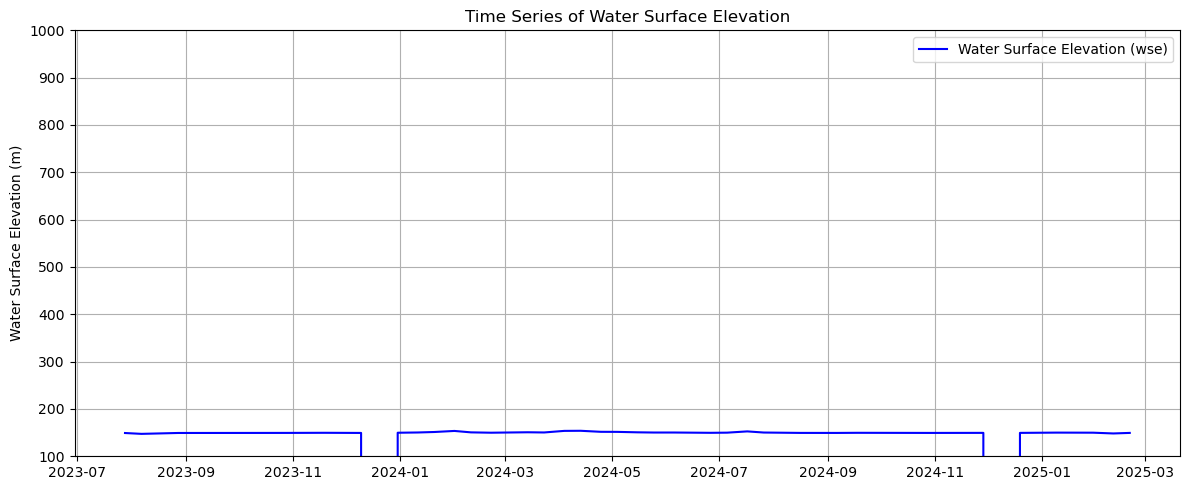

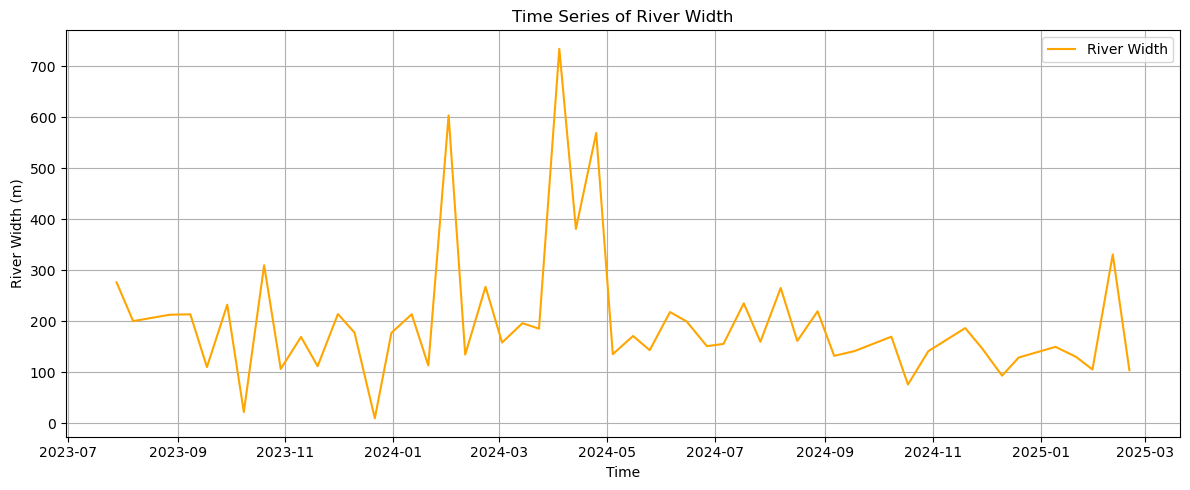

In [30]:
# Convert 'time_str' to datetime
df['time_str'] = pd.to_datetime(df['time_str'], errors='coerce')

# Plot Water Surface Elevation (wse)
plt.figure(figsize=(12, 5))
plt.plot(df['time_str'], df['wse'], label='Water Surface Elevation (wse)', color='blue')
plt.title('Time Series of Water Surface Elevation')
plt.ylabel('Water Surface Elevation (m)')
plt.ylim(100, 1000)  # Set y-axis limits for wse
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('figures_env_inf/wse_timeseries.png', dpi=300)  # Save with high resolution
plt.show()

# Plot River Width
plt.figure(figsize=(12, 5))
plt.plot(df['time_str'], df['width'], label='River Width', color='orange')
plt.title('Time Series of River Width')
plt.xlabel('Time')
plt.ylabel('River Width (m)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('figures_env_inf/width_timeseries.png', dpi=300)  # Save with high resolution
plt.show()

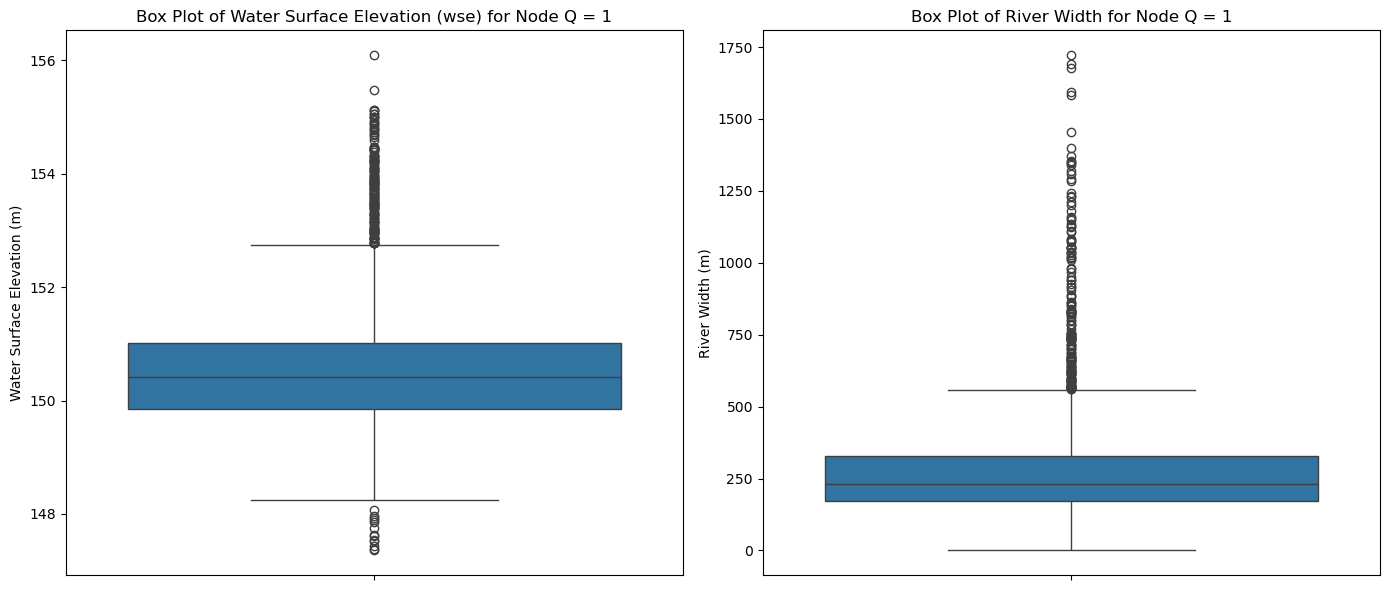

In [ ]:
# Create a box plot for water surface elevation (wse) and river width (width)
plt.figure(figsize=(14, 6))

# Box plot for wse
plt.subplot(1, 2, 1)
sns.boxplot(data=node_q1_data, y='wse')
plt.title('Box Plot of Water Surface Elevation (wse) for Node Q = 1')
plt.ylabel('Water Surface Elevation (m)')
plt.tight_layout()
plt.savefig('figures_env_inf/wse_boxplot.png', dpi=300)  # Save with high resolution

# Box plot for width
plt.subplot(1, 2, 2)
sns.boxplot(data=node_q1_data, y='width')
plt.title('Box Plot of River Width for Node Q = 1')
plt.ylabel('River Width (m)')
plt.tight_layout()
plt.savefig('figures_env_inf/width_boxplot.png', dpi=300)  # Save with high resolution

plt.show()



In [21]:
# Sorting data by width and enforcing increasing WSE condition
node_q1_data_sorted = node_q1_data.sort_values(by="width").reset_index(drop=True)

anomaly_count_wse = 0
anomaly_count_width = 0
filtered_data = []
prev_wse = -np.inf  # Initialize previous wse to a very low value

for _, row in node_q1_data_sorted.iterrows():
    if row["wse"] >= prev_wse:
        filtered_data.append(row)
        prev_wse = row["wse"]
    else:
        anomaly_count_wse += 1
        anomaly_count_width += 1

# Create a filtered DataFrame
df_filtered = pd.DataFrame(filtered_data)

# Update the summary table with the anomaly category
summary["Category"].append("Anomaly")
summary["WSE"].append(anomaly_count_wse)
summary["Width"].append(anomaly_count_width)

# Convert the updated summary to a DataFrame for display
summary_df = pd.DataFrame(summary)
print(summary_df)


            Category   WSE  Width
0            No Data     0      0
1  Box Plot Outliers   170    141
2         Range Fail     0      0
3            Anomaly  2469   2469


In [26]:
# Remove box plot outliers and anomalies
cleaned_data = df_filtered[~df_filtered.index.isin(summary_df[(summary_df['Category'] == 'Box Plot Outliers') | (summary_df['Category'] == 'Anomaly')].index)]
cleaned_data.head()



,wse,width,area_total,time_str,node_q,p_dist_out,wse_units,width_units,area_total_units,p_dist_out_units
0,150.77577,0.146481,31.3,NaT,1,2345316.0,m,m,m^2,m
2,150.94775,2.465814,559.9,NaT,1,2346921.0,m,m,m^2,m
7,151.05186,8.941714,1914.5,NaT,1,2349906.0,m,m,m^2,m
16,151.46381,19.395749,4404.4,NaT,1,2346921.0,m,m,m^2,m
23,151.47934,27.655453,5188.6,NaT,1,2347309.0,m,m,m^2,m


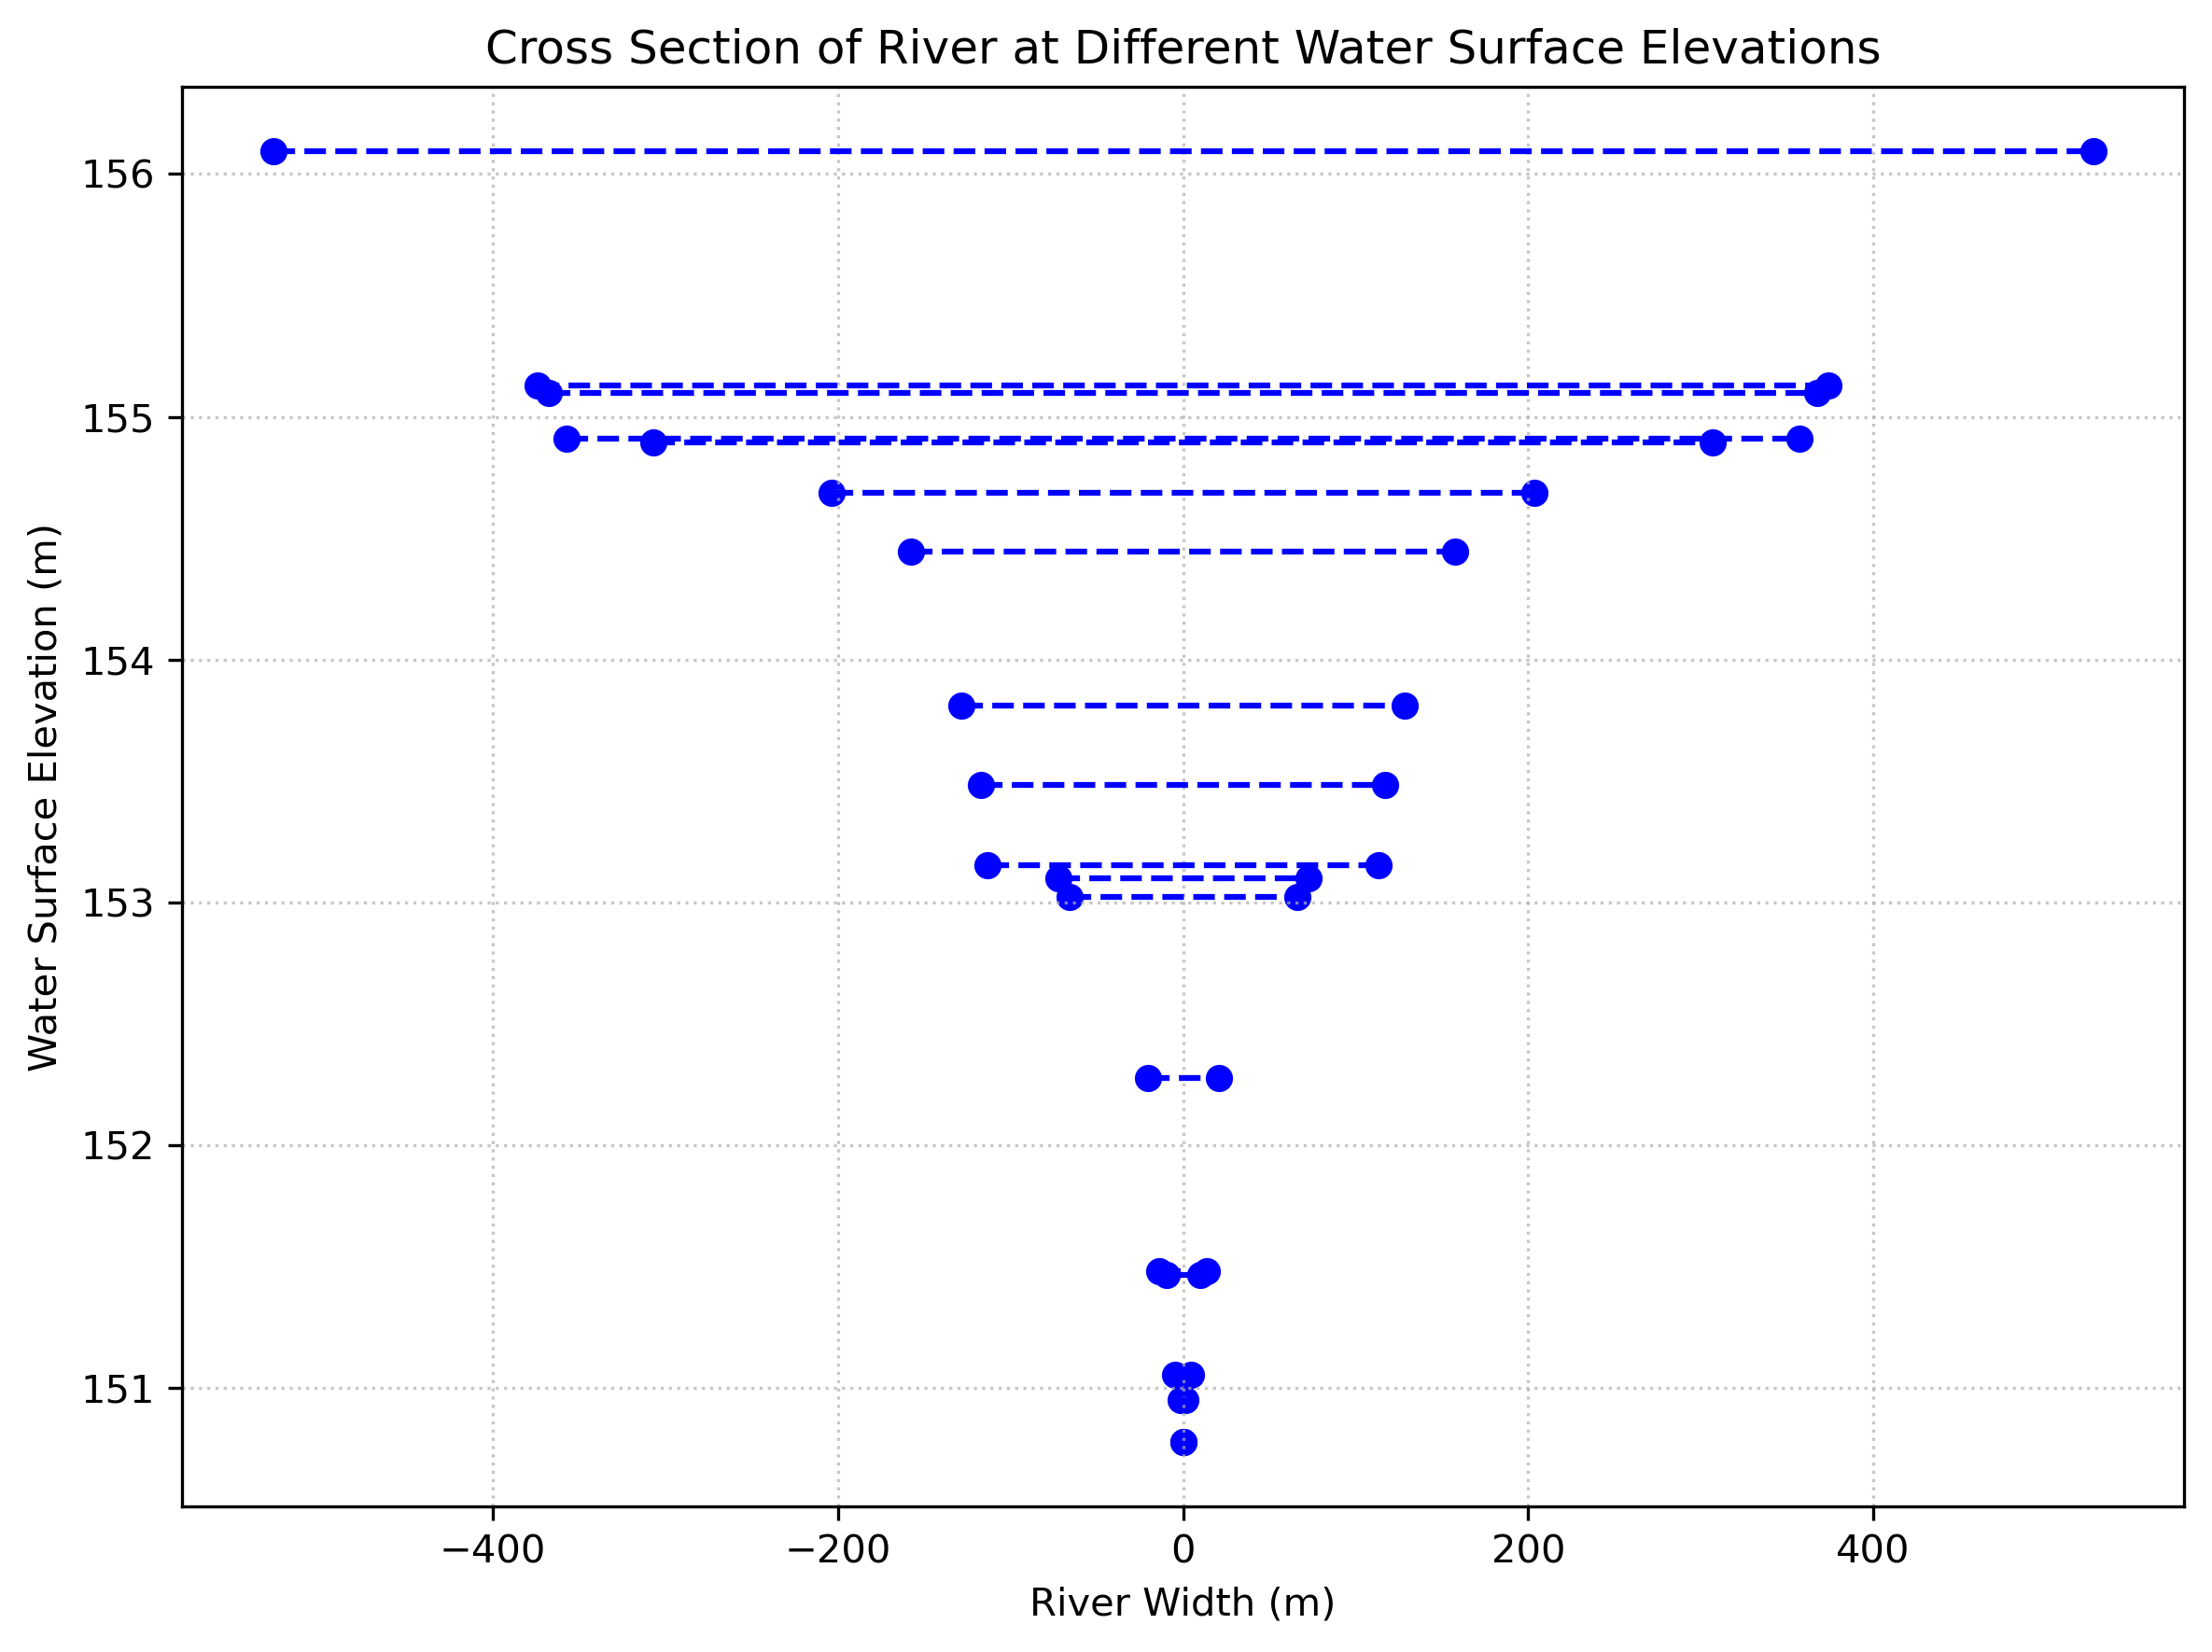

In [32]:
# Plot the cross-section
plt.figure(figsize=(8, 6), dpi=300)  # Set high resolution with dpi=300

for _, row in cleaned_data.iterrows():
    width_half = row["width"] / 2
    wse = row["wse"]

    plt.scatter([-width_half, width_half], [wse, wse], color="blue")
    plt.plot([-width_half, width_half], [wse, wse], linestyle="dashed", color="blue")

plt.xlabel("River Width (m)")
plt.ylabel("Water Surface Elevation (m)")
plt.title("Cross Section of River at Different Water Surface Elevations")
plt.grid(True, linestyle=":", alpha=0.7)
plt.tight_layout()  # Adjust layout
plt.savefig('figures_env_inf/cross_section_node_1.png', dpi=300)  # Save with high resolution
plt.show()